# CRISP-DM

CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is a popular process workflow method in data science for addressing data mining or data analysis projects.

CRISP-DM consists of six main stages:

1. **Business Understanding**: This stage involves understanding the business objectives and requirements from a business perspective. It involves identifying the business problem or opportunity to be addressed through data analysis.

2. **Data Understanding**: This stage involves gathering relevant data for analysis. It includes data collection, data cleaning, exploration, and understanding.

3. **Data Preparation**: This stage involves processing and preparing data for further analysis. It includes feature selection, further data cleaning, data transformation, and forming datasets ready for modeling.

4. **Modeling**: This stage involves building and evaluating potential data mining models. It includes selecting appropriate models, training models on available data, tuning model parameters, and evaluating models to ensure quality and performance.

5. **Evaluation**: This stage involves evaluating the results of the model and data analysis to ensure that the solutions produced meet business objectives and user needs. It also involves assessing model performance and identifying necessary improvement steps.

6. **Deployment**: This final stage involves deploying the generated models and solutions into operational environments. It includes implementing models, further testing, and integrating solutions into existing business processes or systems.

CRISP-DM is a flexible and adaptable framework that can be used in various data analysis projects. It helps organize and manage the data analysis workflow from start to finish, ensuring project success and effective use of data to support decision-making.

### Example

In facing the COVID-19 pandemic, a deep understanding of data is a very valuable asset for various parties, including the government, health institutions and the general public. Data analysis on the Indonesian COVID-19 dataset aims to provide better insight into this pandemic, as well as assist in making effective decisions in dealing with the public health crisis. The COVID-19 dataset in Indonesia is arranged based on time series, national level and provincial level. , also accompanied by demographic data from that location/region. This dataset is a compilation of various open data sources, such as the official government website of the COVID-19 Task Force, the Central Statistics Agency, and the InaCOVID-19 Hub.

By utilizing this dataset, several important things that can be explored are:
1) On what date was the highest number of new COVID 19 cases reported in one day?
2) Which province had the highest number of new cases per day?
3) Which island had the highest number of COVID 19 cases per day?
4) Which province had the highest number of new cases per day? highest daily healing?

import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df=pd.read_csv('covid_19_indonesia_time_series_all.csv')

Preview Dataset

In [3]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


Check Info Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

### DATA CLEANSING

In [8]:
# Check data Null

df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [9]:
df.drop(['Location ISO Code', 'City or Regency', 'Country', 'Continent', 'Time Zone', 'Special Status', 'Total Cities', 'Total Districts', 'Total Regencies', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)', 'New Cases per Million', 'Total Cases per Million', 'New Deaths per Million', 'Total Deaths per Million', 'Growth Factor of New Cases', 'Growth Factor of New Deaths'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    31822 non-null  object 
 1   Location                31822 non-null  object 
 2   New Cases               31822 non-null  int64  
 3   New Deaths              31822 non-null  int64  
 4   New Recovered           31822 non-null  int64  
 5   New Active Cases        31822 non-null  int64  
 6   Total Cases             31822 non-null  int64  
 7   Total Deaths            31822 non-null  int64  
 8   Total Recovered         31822 non-null  int64  
 9   Total Active Cases      31822 non-null  int64  
 10  Location Level          31822 non-null  object 
 11  Province                30893 non-null  object 
 12  Island                  30893 non-null  object 
 13  Population              31822 non-null  int64  
 14  Population Density      31822 non-null

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [12]:
df.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Island,Population,Population Density,Longitude,Latitude,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,51.28%,192.31%
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,48.78%,182.93%
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,265185520,138.34,113.921327,-0.789275,0.00,0.00%,0.00%
3,2020-03-02,Riau,1,0,0,1,1,0,1,0,Province,Riau,Sumatera,6074100,69.80,101.805109,0.511648,0.00,0.00%,100.00%
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,DKI Jakarta,Jawa,10846145,16334.31,106.836118,-6.204699,0.18,46.51%,174.42%


## Answer Question

In [13]:
top_8_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases', 'Location']][:8]
top_8_date_new_cases

,Date,New Cases,Location
0,2022-02-16,64718,Indonesia
1,2022-02-17,63956,Indonesia
2,2022-02-23,61488,Indonesia
3,2022-02-18,59635,Indonesia
4,2022-02-19,59384,Indonesia
5,2022-02-22,57491,Indonesia
6,2022-02-24,57426,Indonesia
7,2022-02-15,57049,Indonesia


In [22]:
# Visualization Q1
top_8_date_new_cases = df.sort_values(by='New Cases', ascending=False, ignore_index=True)[['Date', 'New Cases', 'Location']][:8]

x1_2 = list(top_8_date_new_cases.sort_values(by='Date')['Date'])
y1_2 = list(top_8_date_new_cases.sort_values(by='Date')['New Cases'])

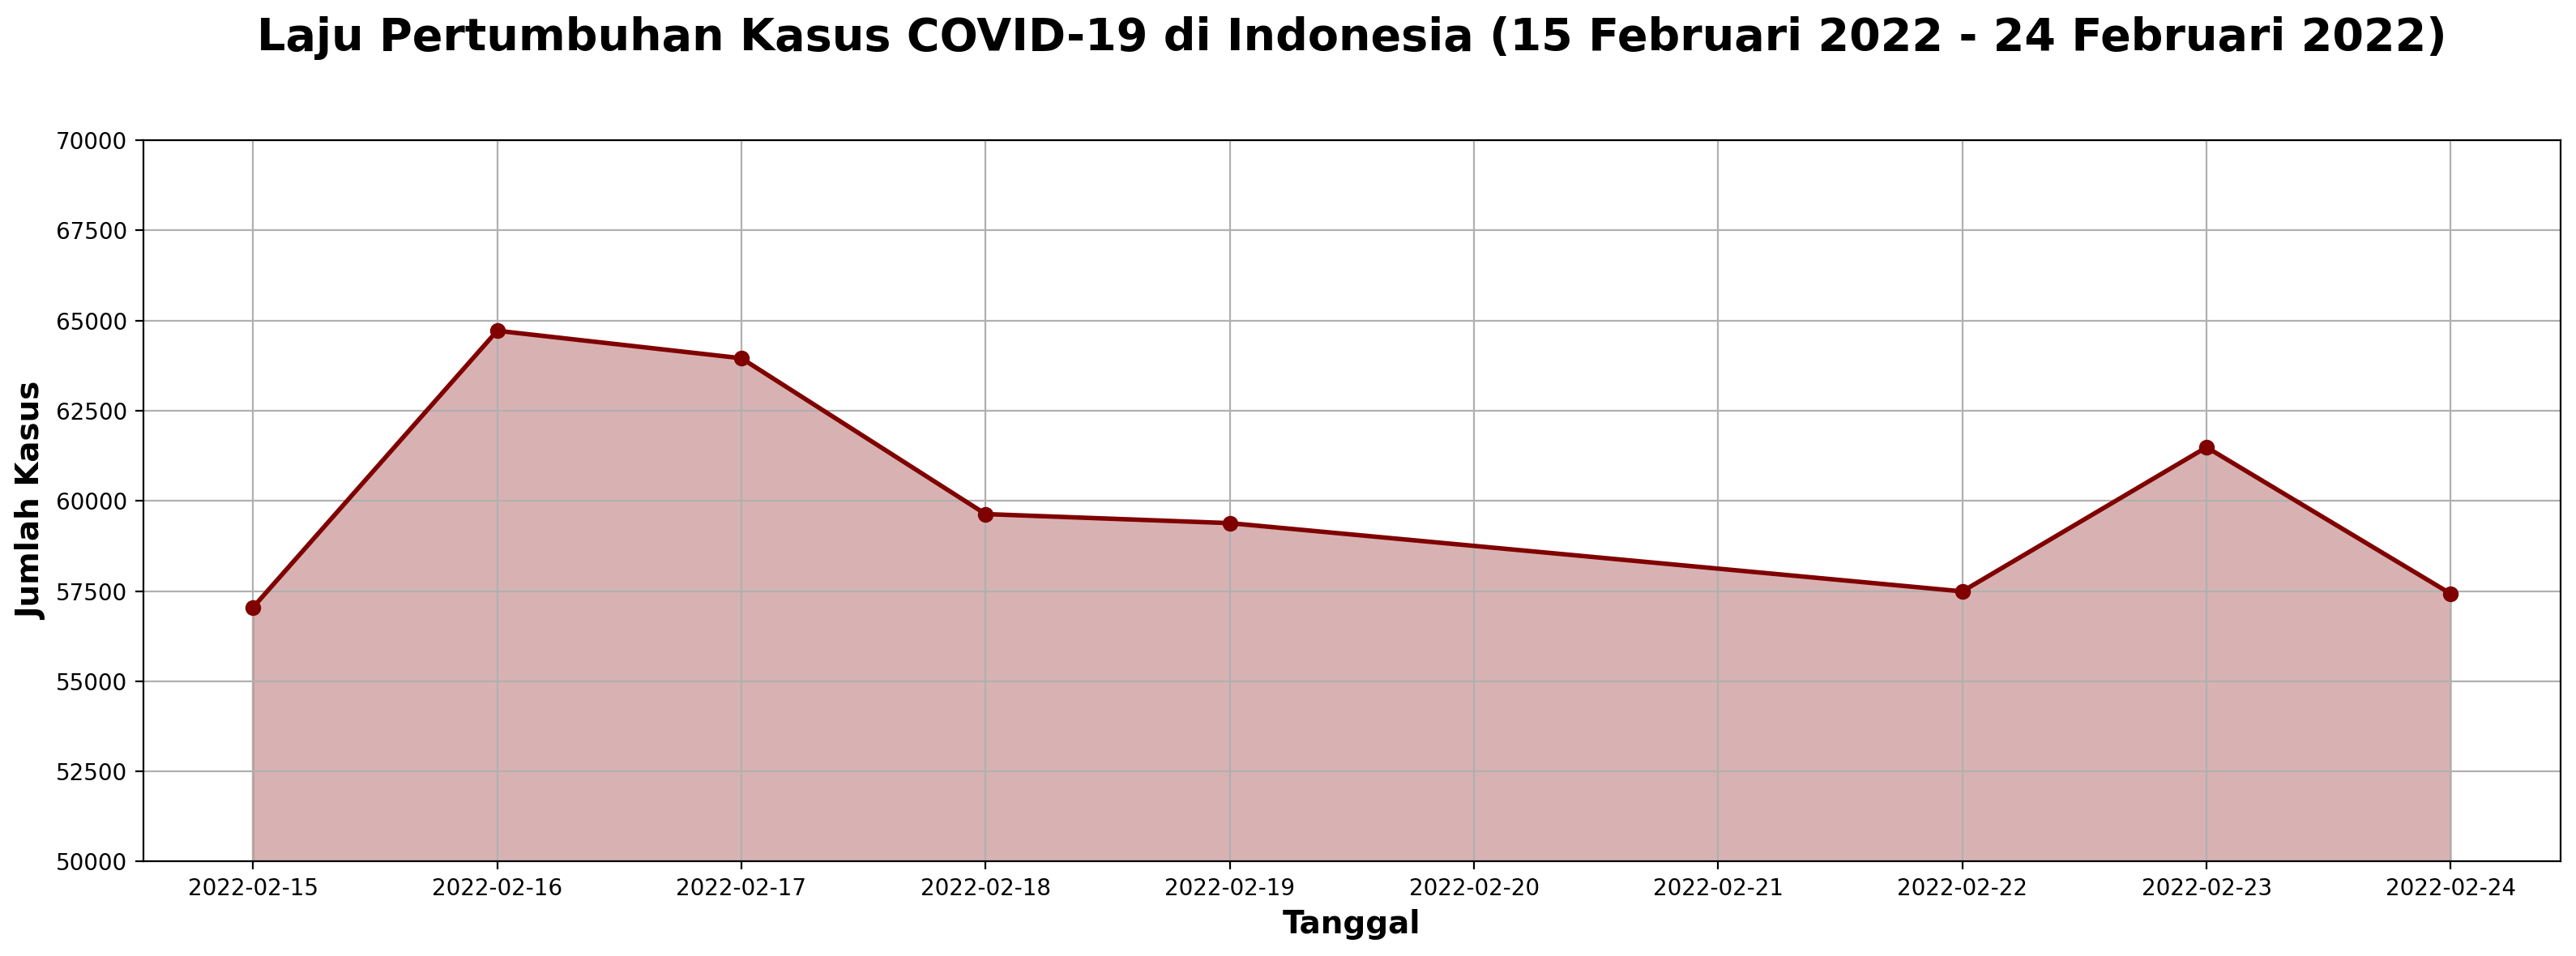

In [23]:
# Plotting visualization with area chart
plt.figure(figsize=(16, 6), dpi=200)
plt.fill_between(x1_2, y1_2, color='maroon', alpha=0.3)  # Area chart dengan warna maroon dan opacity 0.3
plt.plot(x1_2, y1_2, color='maroon', marker='o', linestyle='-', linewidth=2)  # Garis plot untuk detail data
plt.ylim(ymin=50000, ymax=70000)
plt.title('Laju Pertumbuhan Kasus COVID-19 di Indonesia (15 Februari 2022 - 24 Februari 2022)', fontsize=20, fontweight='bold', pad=40)
plt.xlabel('Tanggal', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Kasus', fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the visualization above, it can be seen that the growth of cases started in the middle of February 2022, namely on February 15, then experienced a drastic spike on February 16 2022, where the highest number of new COVID 19 cases were found in one day, namely on that date with a total of 64,718 cases. Then it experienced a decline from 17 February to 22 February, but experienced an increase again on 23 February. Then on February 24 the number of cases decreased again.Based on the table and data visualization above, it is known that the top 8 dates with the most COVID 19 cases per day were in February 2022.

In [16]:
df_not_ll = df.loc[df['Location Level'] == 'Province'].sort_values(by='New Cases', ascending=False)[['Province', 'New Cases']]
df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]

,New Cases
Province,
DKI Jakarta,1412474
Jawa Barat,1173731
Jawa Tengah,636409
Jawa Timur,601534
Banten,333875


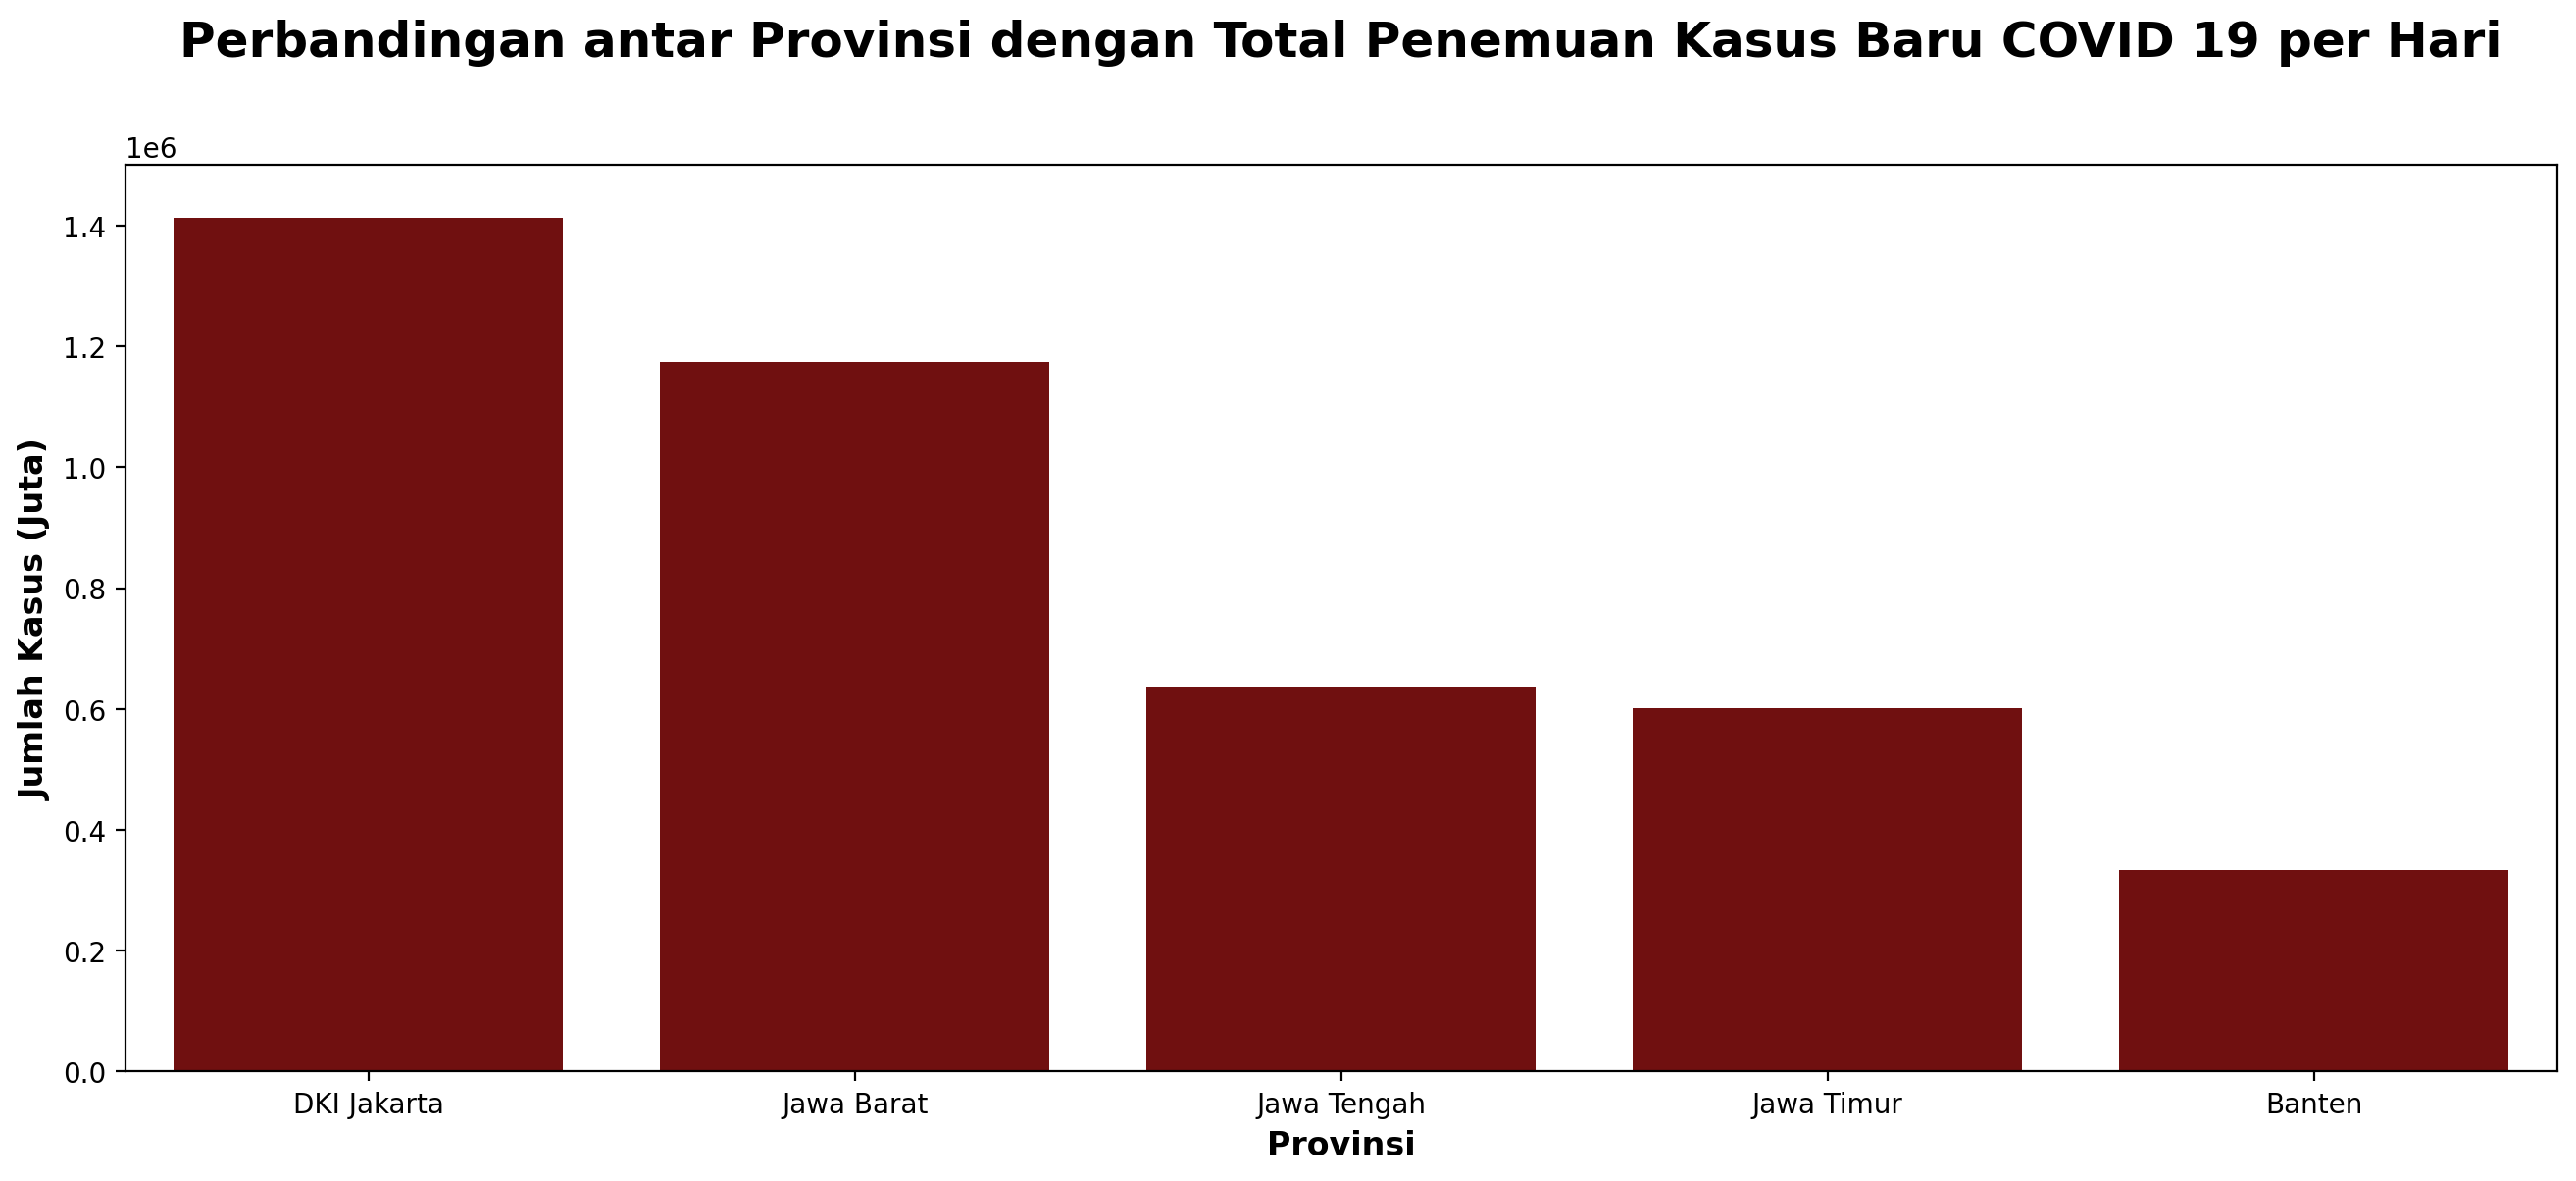

In [17]:
## Visualisasi Q2
a22 = df_not_ll.groupby('Province')[['New Cases']].sum().sort_values(by='New Cases', ascending=False)[:5]
x2_2 = list(a22.to_dict()['New Cases'].keys())
y2_2 = list(a22.to_dict()['New Cases'].values())

plt.style.use('default')
fg, ax = plt.subplots(figsize=(16,6), dpi=200)
sns.barplot(x=x2_2, y=y2_2, color='maroon')
plt.ylim(ymax=1500000)
plt.title('Perbandingan antar Provinsi dengan Total Penemuan Kasus Baru COVID 19 per Hari', fontsize=18, fontweight='bold', pad=40)
plt.xlabel('Provinsi', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Kasus (Juta)', fontsize=12, fontweight='bold')
plt.show()


Based on the visualization above, it can be seen that DKI Jakarta Province has the highest total cases per day of 1,412,474 cases, followed by the Provinces of West Java, Central Java, East Java and Banten.

In [18]:
top_islands_new_cases = df.loc[df.Island != None].groupby(['Island'])[['New Cases']].sum().sort_values(by='New Cases', ascending=False)
top_islands_new_cases

,New Cases
Island,
Jawa,4382330
Sumatera,822718
Kalimantan,465732
Sulawesi,313608
Nusa Tenggara,297493
Papua,82097
Maluku,33331


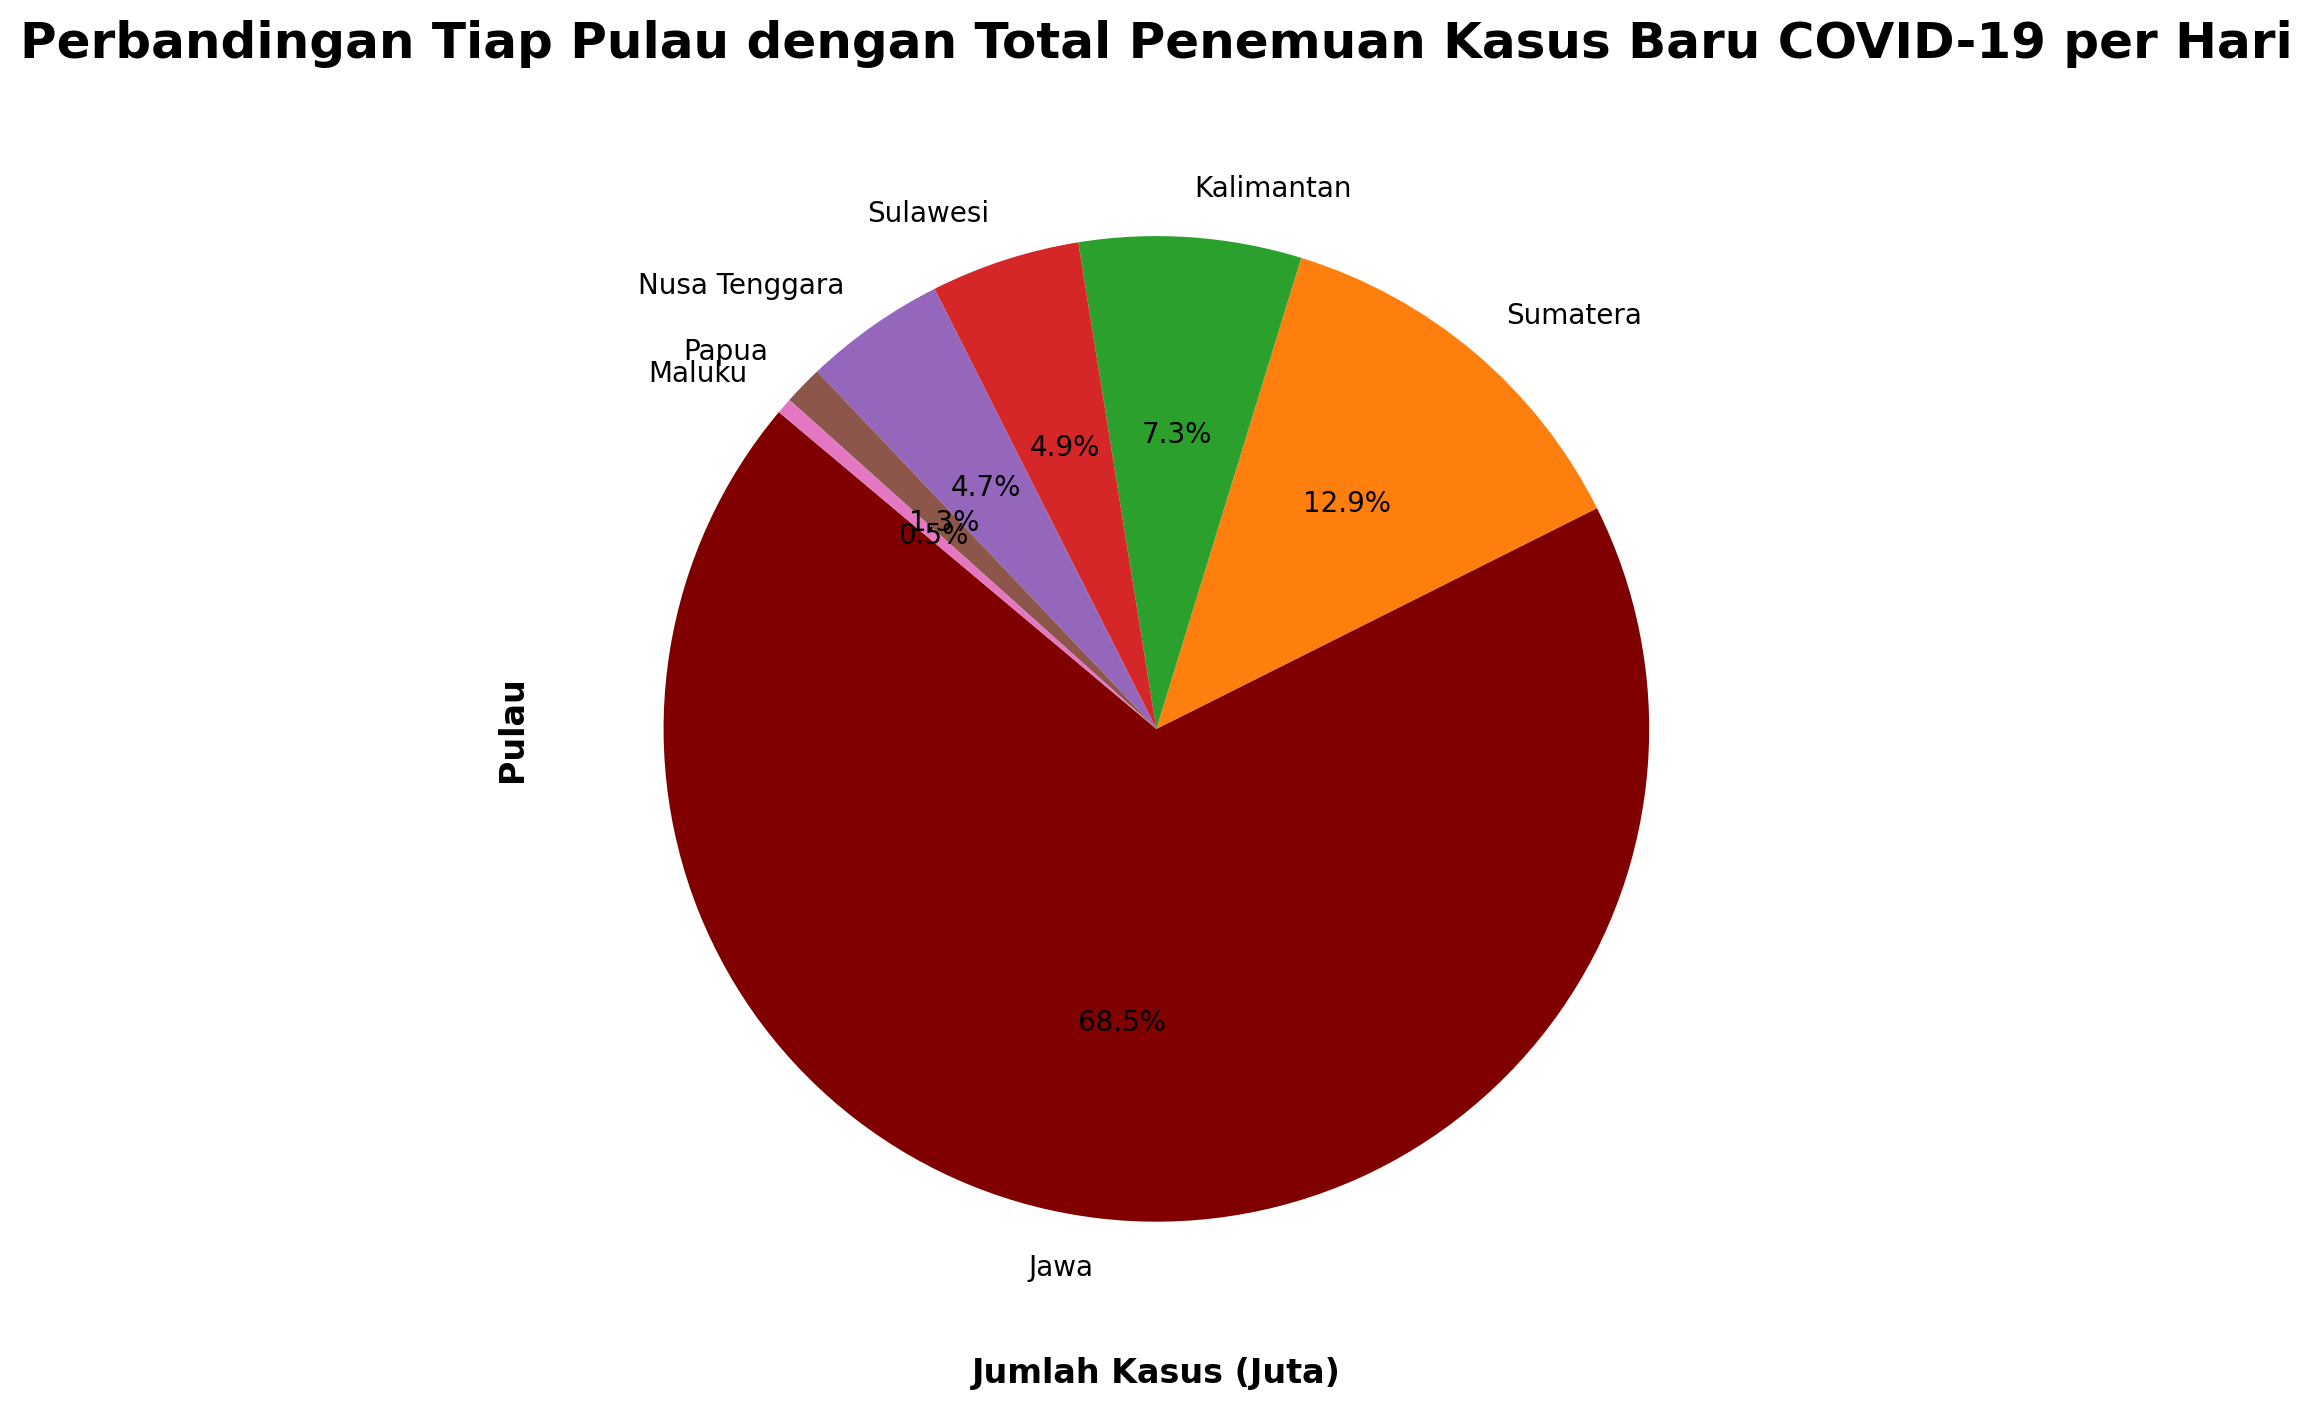

In [19]:
## Visualization Q3
x3_2 = list(top_islands_new_cases.to_dict()['New Cases'].keys())
y3_2 = list(top_islands_new_cases.to_dict()['New Cases'].values())

# Size Visualization
plt.figure(figsize=(12, 8), dpi=200)

# Make a pie chart
plt.pie(y3_2, labels=x3_2, colors=['maroon', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'], autopct='%1.1f%%', startangle=140)

# Add Title and Lable Sumbu
plt.title('Perbandingan Tiap Pulau dengan Total Penemuan Kasus Baru COVID-19 per Hari', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Jumlah Kasus (Juta)', fontsize=12, fontweight='bold')
plt.ylabel('Pulau', fontsize=12, fontweight='bold')

# View pie chart
plt.show()

Based on the visualization above, the highest total number of COVID 19 cases discovered per day is centered on the island of Java with the number of cases reaching up to 4 million cases per day or 68.5%. The comparison looks very striking when compared with the total number of COVID 19 cases discovered per day on other islands. This shows that the visualization results above are in accordance with the previous analysis, where the 5 provinces with the highest total number of COVID 19 cases per day were found on the island of Java.

In [20]:
top_province_new_rcvry = df.loc[df['Location Level'] == 'Province'].groupby(['Province'])[['New Recovered']].sum().sort_values(by='New Recovered', ascending=False)
top_province_new_rcvry[:10]

,New Recovered
Province,
DKI Jakarta,1386059
Jawa Barat,1144298
Jawa Tengah,601506
Jawa Timur,568666
Banten,328372
Daerah Istimewa Yogyakarta,217710
Kalimantan Timur,203019
Bali,161626
Sumatera Utara,154914


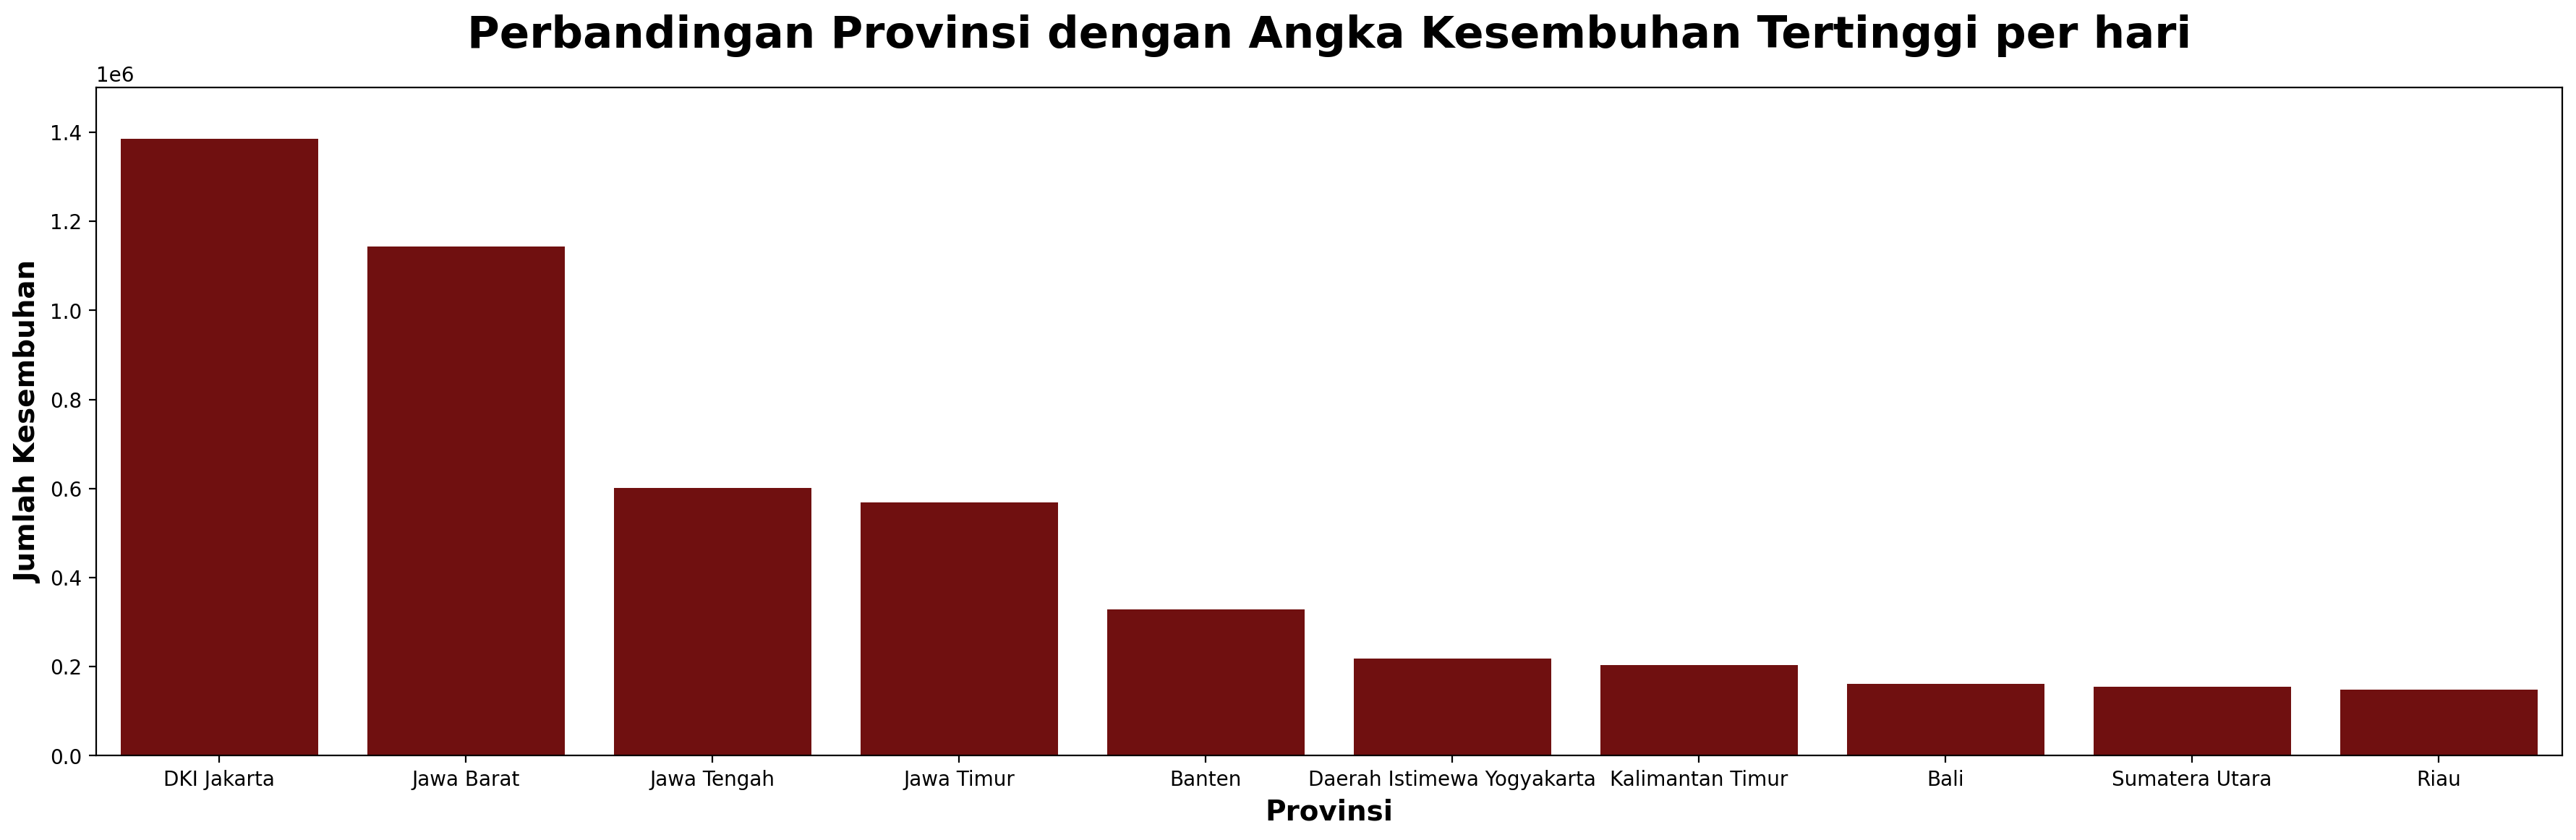

In [21]:
# Visualization Q4
x4_2 = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].keys())
y4_2 = list(top_province_new_rcvry[:10].to_dict()['New Recovered'].values())

plt.style.use('default')
fg, ax = plt.subplots(figsize=(22,6), dpi=200)
sns.barplot(x=x4_2, y=y4_2, color='#800000')
plt.title('Perbandingan Provinsi dengan Angka Kesembuhan Tertinggi per hari', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Provinsi', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Kesembuhan', fontsize=14, fontweight='bold')
plt.ylim(ymax=1500000)
plt.show()

Based on the visualization above, it can be seen that the province of DKI Jakarta is superior in the number of cures per day of 1,386,059, which is almost nine times higher than the province of Riau which occupies the lowest position in the number of cures of COVID 19 cases per day, namely 147,972.